In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel(r'D:\Project\SVAG\Data\acq_data.xlsx', sheet_name = 'Data')
df.head()

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,ENQ_1,ENQ_2,ENQ_3,ENQ_4,ENQ_5,ENQ_6,ENQ_7,ENQ_8,ACCOUNT_9,ACCOUNT_10,ACCOUNT_11,ACCOUNT_12,ACCOUNT_13,ACCOUNT_14,ACCOUNT_15,ACCOUNT_16,ACCOUNT_17,ACCOUNT_18,ACCOUNT_19,ACCOUNT_20,ACCOUNT_21
0,1794,40.0,SALARIED,70891.0,62491.0,MALE,OTHERS,MARRIED,229.0,108,INDIVIDUAL,37806.0,0.19,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.0,SALARIED,53617.0,53617.0,MALE,OTHERS,MARRIED,408.0,60,INDIVIDUAL,15499.0,0.42,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289
2,1841,46.0,SALARIED,20000.0,45912.0,MALE,OTHERS,MARRIED,552.0,204,INDIVIDUAL,15034.0,0.34,0,688,0,0,0,0,0,3,0,0,0,681,4,2,1,1,1,0,15695,15695,0,5153
3,1115,49.0,SALARIED,40000.0,77440.0,FEMALE,OTHERS,MARRIED,0.0,0,INDIVIDUAL,27349.0,0.08,0,52,52,2,2,3,2,3,2,0,0,5143,1,1,0,1,1,0,480051,480051,0,5143
4,3125,45.0,SELF EMPLOYED,36526.0,36526.0,MALE,OTHERS,MARRIED,540.0,22,INDIVIDUAL,28520.0,0.48,0,33,0,1,0,1,0,2,0,5,5,3310,2,0,0,1,0,0,2781,2781,0,5093


In [3]:
df.isna().sum()

ID                         0
Age                        1
Customer_type              0
Gross_income               0
Net_income                 0
SEX                        4
Type_of_industry           5
Marital_Status             4
Months_in_city             4
Months_in_current_job      0
Org_Type                   0
Bank_balance             636
Debt_ratio                 0
Target                     0
ENQ_1                      0
ENQ_2                      0
ENQ_3                      0
ENQ_4                      0
ENQ_5                      0
ENQ_6                      0
ENQ_7                      0
ENQ_8                      0
ACCOUNT_9                  0
ACCOUNT_10                 0
ACCOUNT_11                 0
ACCOUNT_12                 0
ACCOUNT_13                 0
ACCOUNT_14                 0
ACCOUNT_15                 0
ACCOUNT_16                 0
ACCOUNT_17                 0
ACCOUNT_18                 0
ACCOUNT_19                 0
ACCOUNT_20                 0
ACCOUNT_21    

# Data Preprocessing

In [4]:
# renaming the column names
df.rename( columns = { 'ENQ_1': 'Last_ENQ_Days_Other_Bnk', 'ENQ_2':'Last_Home_ENQ_Days_Other_Bnk', 'ENQ_3':'Tot_ENQ_Last_3M', 'ENQ_4':'Tot_Home_ENQ_Last_3M', 'ENQ_5':'Tot_ENQ_Last_12M', 'ENQ_6':'Tot_Home_ENQ_Last_12M', 'ENQ_7':'Tot_ENQ',
       'ENQ_8':'Tot_Home_ENQ', 'ACCOUNT_9':'No_of_Defaults_3M', 'ACCOUNT_10':'No_of_Defaults_12M' ,'ACCOUNT_11':'Days_Since_Last_ACC_Open', 'ACCOUNT_12':'Tot_No_of_Loan_Other_Bnk_(L+C)',
       'ACCOUNT_13':'Tot_No_of_Home_Loan_Other_Bnk_(L+C)', 'ACCOUNT_14':'Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)', 'ACCOUNT_15':'Tot_No_of_Live_Loans', 'ACCOUNT_16':'Tot_No_of_Live_Home_Loans', 'ACCOUNT_17':'Tot_No_of_Live_UNSEC_Loans',
       'ACCOUNT_18':'Tot_O/S_Amt', 'ACCOUNT_19':'Tot_SEC_O/S_Amt', 'ACCOUNT_20':'Tot_UNSEC_O/S_Amt', 'ACCOUNT_21':'Avg_No_of_Days_In_Debt'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3980 non-null   int64  
 1   Age                                   3979 non-null   float64
 2   Customer_type                         3980 non-null   object 
 3   Gross_income                          3980 non-null   float64
 4   Net_income                            3980 non-null   float64
 5   SEX                                   3976 non-null   object 
 6   Type_of_industry                      3975 non-null   object 
 7   Marital_Status                        3976 non-null   object 
 8   Months_in_city                        3976 non-null   float64
 9   Months_in_current_job                 3980 non-null   int64  
 10  Org_Type                              3980 non-null   object 
 11  Bank_balance     

In [5]:
# count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)

# Calculate percentage of null value
missing_percentage=missing_number*100/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(10)

,missing number,missing percentage
Bank_balance,636,15.979899
Type_of_industry,5,0.125628
Marital_Status,4,0.100503
SEX,4,0.100503
Months_in_city,4,0.100503
Age,1,0.025126
Org_Type,0,0.000000
Last_ENQ_Days_Other_Bnk,0,0.000000
Target,0,0.000000
Debt_ratio,0,0.000000


In [6]:
# Shape of Data before removing Duplicates
display(df.shape)

# Displaying the Duplicates in ID column
print(df.duplicated(['ID']).sum())

# Removing the duplicates from ID column
df = df.drop_duplicates(keep='first')

# Shape of Data after removing Duplicates
display(df.shape)

(3980, 35)

86


(3894, 35)

In [7]:
df_num = df.select_dtypes(include=['int64', 'float64'])
display(df_num.nunique(axis = 0))

ID                                      3894
Age                                       50
Gross_income                            2245
Net_income                              2581
Months_in_city                           117
Months_in_current_job                    246
Bank_balance                            3023
Debt_ratio                               466
Target                                     2
Last_ENQ_Days_Other_Bnk                  738
Last_Home_ENQ_Days_Other_Bnk             700
Tot_ENQ_Last_3M                           21
Tot_Home_ENQ_Last_3M                      13
Tot_ENQ_Last_12M                          45
Tot_Home_ENQ_Last_12M                     22
Tot_ENQ                                   98
Tot_Home_ENQ                              40
No_of_Defaults_3M                          8
No_of_Defaults_12M                         8
Days_Since_Last_ACC_Open                1308
Tot_No_of_Loan_Other_Bnk_(L+C)            59
Tot_No_of_Home_Loan_Other_Bnk_(L+C)       17
Tot_No_of_

In [8]:
# Age: 1 value to be replaced
df.Age.fillna( df.Age.mean() , inplace = True)

# SEX: 4 values to be replaced
df.SEX.fillna("UNKNOWN", inplace = True)
#df.dropna(subset = ['SEX'],inplace = True)

# Marital_status: 4 values to be replaced
df.Marital_Status.fillna("NOT SPECIFIED", inplace = True)
#df.dropna(subset = ['Marital_Status'],inplace = True)

# Type_of_industry: 5 values to be replaced
df.Type_of_industry.fillna(df.Type_of_industry.mode()[0] , inplace = True)
# since this column is categorical, we will fill the null values by the most occurring value in the column or mode value.

# months_in_city :4 values
df.Months_in_city.fillna(df.Age*12 ,inplace = True)
df.Bank_balance.fillna(-999.9,inplace = True)
display(df.isna().sum())

ID                                      0
Age                                     0
Customer_type                           0
Gross_income                            0
Net_income                              0
SEX                                     0
Type_of_industry                        0
Marital_Status                          0
Months_in_city                          0
Months_in_current_job                   0
Org_Type                                0
Bank_balance                            0
Debt_ratio                              0
Target                                  0
Last_ENQ_Days_Other_Bnk                 0
Last_Home_ENQ_Days_Other_Bnk            0
Tot_ENQ_Last_3M                         0
Tot_Home_ENQ_Last_3M                    0
Tot_ENQ_Last_12M                        0
Tot_Home_ENQ_Last_12M                   0
Tot_ENQ                                 0
Tot_Home_ENQ                            0
No_of_Defaults_3M                       0
No_of_Defaults_12M                

In [9]:
# RATHER PREDICTING BANAK_BALANCE WILL REMOVE THE COLUMN SO THAT IT DOESNT HARM OUR ACCURACY.
del [df['Months_in_city'],df['Months_in_current_job']]

## SEGMENTATION > SALARIED AND SELF-EMPLOYED

In [10]:
pd.crosstab( df['Customer_type'], df['Target'])

Target,0,1
Customer_type,,
NON EARNING,22,1
SALARIED,1606,63
SELF EMPLOYED,1968,234


In [11]:
df.shape

(3894, 33)

In [12]:
# Drop the non-earning customer_type

In [13]:
df = df.loc[df['Customer_type']!='NON EARNING']

In [14]:
df.shape

(3871, 33)

* WILL NOT BE PERFORMING SEGMENTATION DUE TO SOME RESTRICTIONS.
* ADDING NEW VARIABLE RATIOS

In [15]:
df['Income/Age'] = df['Net_income']/df['Age']
df['Tot_ENQ_12M/Tot_ENQ'] = df['Tot_ENQ_Last_12M']/df['Tot_ENQ']
df['Tot_ENQ_3M/Tot_ENQ'] = df['Tot_ENQ_Last_3M']/df['Tot_ENQ']
df['Tot_Home_ENQ_12M/Tot_Home_ENQ'] =df['Tot_Home_ENQ_Last_12M']/df['Tot_Home_ENQ']
df['Tot_Home_ENQ_3M/Tot_Home_ENQ'] =df['Tot_Home_ENQ_Last_3M']/df['Tot_Home_ENQ']
df['Tot_ENQ_3M/12M'] = df['Tot_ENQ_Last_3M']/df['Tot_ENQ_Last_12M']
df['Tot_Home_ENQ_3M/12M'] = df['Tot_Home_ENQ_Last_3M']/df['Tot_Home_ENQ_Last_12M']
df['Tot_Home_ENQ_3M/Tot_ENQ_3M'] = df['Tot_Home_ENQ_Last_3M']/df['Tot_ENQ_Last_3M']
df['Tot_Home_ENQ_12M/Tot_ENQ_12M'] = df['Tot_Home_ENQ_Last_12M'] / df['Tot_ENQ_Last_12M']
df['Tot_ENQ/Working_Age'] = df['Tot_ENQ'] /( df['Age'] - 20 )
df['Tot_Home_ENQ_3M/Tot_ENQ'] = df['Tot_Home_ENQ_Last_3M']/df['Tot_ENQ']
df['Tot_Home_ENQ_12M/Tot_ENQ'] = df['Tot_Home_ENQ_Last_12M']/df['Tot_ENQ']


df['Defaults_3M/12M'] = df['No_of_Defaults_3M'] / df['No_of_Defaults_12M']
df['Tot_UNSEC/Tot_Live_Loan'] = df['Tot_No_of_Live_UNSEC_Loans']/df['Tot_No_of_Live_Loans']
df['Months_in_Debt/Tot_Live_Loans'] = (df['Avg_No_of_Days_In_Debt']/30)/df['Tot_No_of_Live_Loans']
df['o/s_Amt_SEC/Tot_o/s'] = df['Tot_SEC_O/S_Amt'] / df['Tot_O/S_Amt']
df['o/s_Amt_UNSEC/Tot_o/s'] = (df['Tot_UNSEC_O/S_Amt'] / df['Tot_O/S_Amt'])
df['Tot_Live/Tot_(L+C)'] = df['Tot_No_of_Live_Loans']/df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Tot_Home_Live/Tot_Home_(L+C)'] = df['Tot_No_of_Live_Home_Loans'] / df['Tot_No_of_Home_Loan_Other_Bnk_(L+C)']
df['Tot_UNSEC_Live/Tot_UNSEC_(L+C)'] = df['Tot_No_of_Live_UNSEC_Loans'] / df['Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)']
df['Tot_Home_Live/Tot_(L+C)'] = df['Tot_No_of_Live_Home_Loans'] / df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Tot_UNSEC_Live/Tot_(L+C)'] = df['Tot_No_of_Live_UNSEC_Loans'] / df['Tot_No_of_Loan_Other_Bnk_(L+C)']

df['Tot_ACC/Working_Age'] = df['Tot_No_of_Loan_Other_Bnk_(L+C)']/(df['Age'] -20 )
df['Tot_no_Home(L+C)/Tot_Loan_Other_Bank'] = df['Tot_No_of_Home_Loan_Other_Bnk_(L+C)'] / df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Tot_no_UNSEC(L+C)/Tot_Loan_Other_Bank'] = df['Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)'] / df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Closed_Tot/Tot_(L+C)'] = (df['Tot_No_of_Loan_Other_Bnk_(L+C)']-df['Tot_No_of_Live_Loans'])/df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Closed_Home/Tot_(L+C)'] = (df['Tot_No_of_Home_Loan_Other_Bnk_(L+C)']-df['Tot_No_of_Live_Home_Loans'])/df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Closed_Home/Tot_Home_(L+C)'] = (df['Tot_No_of_Home_Loan_Other_Bnk_(L+C)']-df['Tot_No_of_Live_Home_Loans'])/df['Tot_No_of_Home_Loan_Other_Bnk_(L+C)']
df['Closed_UNSEC/Tot_(L+C)'] = (df['Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)']-df['Tot_No_of_Live_UNSEC_Loans'])/df['Tot_No_of_Loan_Other_Bnk_(L+C)']
df['Closed_UNSEC/Tot_UNSEC_(L+C)'] = (df['Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)']-df['Tot_No_of_Live_UNSEC_Loans'])/df['Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)']                                                                                                                        

In [16]:
df.replace(np.nan, 0.00,inplace = True)     # 0/0 NaN values are been replaced by '0.00'

In [17]:
df.shape

(3871, 63)

* Random Forest Classification Feature Importance

In [18]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [19]:
col_cat = df.select_dtypes( ['object']).columns
data_1 = pd.get_dummies(df, columns = col_cat)
display(data_1.shape)
data_1.head()

(3871, 160)

,ID,Age,Gross_income,Net_income,Bank_balance,Debt_ratio,Target,Last_ENQ_Days_Other_Bnk,Last_Home_ENQ_Days_Other_Bnk,Tot_ENQ_Last_3M,Tot_Home_ENQ_Last_3M,Tot_ENQ_Last_12M,Tot_Home_ENQ_Last_12M,Tot_ENQ,Tot_Home_ENQ,No_of_Defaults_3M,No_of_Defaults_12M,Days_Since_Last_ACC_Open,Tot_No_of_Loan_Other_Bnk_(L+C),Tot_No_of_Home_Loan_Other_Bnk_(L+C),Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C),Tot_No_of_Live_Loans,Tot_No_of_Live_Home_Loans,Tot_No_of_Live_UNSEC_Loans,Tot_O/S_Amt,Tot_SEC_O/S_Amt,Tot_UNSEC_O/S_Amt,Avg_No_of_Days_In_Debt,Income/Age,Tot_ENQ_12M/Tot_ENQ,Tot_ENQ_3M/Tot_ENQ,Tot_Home_ENQ_12M/Tot_Home_ENQ,Tot_Home_ENQ_3M/Tot_Home_ENQ,Tot_ENQ_3M/12M,Tot_Home_ENQ_3M/12M,Tot_Home_ENQ_3M/Tot_ENQ_3M,Tot_Home_ENQ_12M/Tot_ENQ_12M,Tot_ENQ/Working_Age,Tot_Home_ENQ_3M/Tot_ENQ,Tot_Home_ENQ_12M/Tot_ENQ,Defaults_3M/12M,Tot_UNSEC/Tot_Live_Loan,Months_in_Debt/Tot_Live_Loans,o/s_Amt_SEC/Tot_o/s,o/s_Amt_UNSEC/Tot_o/s,Tot_Live/Tot_(L+C),Tot_Home_Live/Tot_Home_(L+C),Tot_UNSEC_Live/Tot_UNSEC_(L+C),Tot_Home_Live/Tot_(L+C),Tot_UNSEC_Live/Tot_(L+C),Tot_ACC/Working_Age,Tot_no_Home(L+C)/Tot_Loan_Other_Bank,Tot_no_UNSEC(L+C)/Tot_Loan_Other_Bank,Closed_Tot/Tot_(L+C),Closed_Home/Tot_(L+C),Closed_Home/Tot_Home_(L+C),Closed_UNSEC/Tot_(L+C),Closed_UNSEC/Tot_UNSEC_(L+C),Customer_type_SALARIED,Customer_type_SELF EMPLOYED,SEX_FEMALE,SEX_MALE,SEX_UNKNOWN,Type_of_industry_AGRICULTURE,Type_of_industry_AUTO COMPONENTS,Type_of_industry_AUTOMOTIVE,Type_of_industry_BANKING AND FINANCE,Type_of_industry_CEMENT AND CEMENT PRODUCTS,Type_of_industry_CERAMIC TILES AND SANITARY WARE,Type_of_industry_CHEMICALS,Type_of_industry_COAL,Type_of_industry_COMMUNICATION,Type_of_industry_CONSTRUCTION,Type_of_industry_CONSTRUCTION IRRIGATION PROJECTS,Type_of_industry_CONSTRUCTION REAL ESTATE AND INDUSTRIAL,Type_of_industry_CONSUMER ELECTRONICS,Type_of_industry_CONSUMER PRODUCTS,Type_of_industry_CONTAINERS AND PACKING,Type_of_industry_EDUCATION,Type_of_industry_ELECTRICAL EQUIPMENT AND COMPONENTS,Type_of_industry_ELECTRICAL MACHINERY,Type_of_industry_ELECTRONICS,Type_of_industry_ENGINEERING,Type_of_industry_ENTERTAINMENT AND LEISURE,Type_of_industry_ERW STEEL PIPES,Type_of_industry_FABRICATED METAL PRODUCT,Type_of_industry_FMCG,Type_of_industry_FOOD PRODUCTS,Type_of_industry_GEMS AND JEWELLRY,Type_of_industry_GIFT ITEMS AND HANDICRAFTS,Type_of_industry_GLASS AND GLASS PRODUCTS,Type_of_industry_GOVERNMENT,Type_of_industry_HEALTHCARE AND HEALTHCARE PROVIDERS,Type_of_industry_HOSPITALS AND NURSING HOMES,Type_of_industry_HOTELS AND RESORTS,Type_of_industry_INDUSTRIAL EQUIPMENT,Type_of_industry_INSTITUTIONS AND TRUST,Type_of_industry_INSURANCE,Type_of_industry_IT AND COMMUNICATION,Type_of_industry_IT HARDWARE,Type_of_industry_IT SERVICES,Type_of_industry_LEATHER,Type_of_industry_LIGHT ENGINEERING,Type_of_industry_MACHINE TOOLS,Type_of_industry_MACHINERY AND EQUIPMENT,Type_of_industry_MEDIA,Type_of_industry_MEDIA ADVERTISING,Type_of_industry_MEDIA MOVIES AND ENTERTAINMENT,Type_of_industry_MEDICAL AND OPTICAL INSTRUMENT,Type_of_industry_MEDICAL EQUIPMENT,Type_of_industry_METALS,Type_of_industry_MILK AND DAIRY PRODUCTS,Type_of_industry_NON METAL MINERAL PRODUCT,Type_of_industry_OIL AND GAS ALLIED,Type_of_industry_OTHER MANUFACTURING,Type_of_industry_OTHER SERVICES,Type_of_industry_OTHERS,Type_of_industry_PAINTS,Type_of_industry_PAPER & PULP,Type_of_industry_PETROLEUM PRODUCTS,Type_of_industry_PHARMACEUTICALS BULK DRUGS,Type_of_industry_PHARMACEUTICALS FORMULATIONS,Type_of_industry_PHOTOGRAPHIC EQUIPMENT AND ALLIED PRODUCTS,Type_of_industry_PLASTIC AND PLASTIC PRODUCTS,Type_of_industry_PLASTIC PIPE AND PIPE FITTINGS,Type_of_industry_PLASTIC PRODUCTS,Type_of_industry_PLYWOOD AND LAMINATES,Type_of_industry_POULTRY,Type_of_industry_PRINT MANUFACTURE RECORD MEDIA,Type_of_industry_PRINTING AND PACKAGING,Type_of_industry_PROFESSIONAL SERVICES,Type_of_industry_SECURITY SERVICES,Type_of_industry_STATIONARY AND OTHER SUPPLIES,Type_of_industry_STEEL PIG IRON SPONGE IRON,Type_of_industry_TEA,Type_of_industry_TEXTILE

In [20]:
X = data_1.drop(['Target','ID'], axis = 1)
y = data_1['Target']

# define the model
model = RandomForestClassifier(n_estimators=100)
# fit the model
model.fit(X, y)

RandomForestClassifier()

In [21]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1, random_state=42)

In [22]:
feature_imp = pd.Series(model.feature_importances_,index=data_1.drop(['Target','ID'],axis = 1).columns.tolist()).sort_values(ascending=False)

In [23]:
feature_imp

Income/Age                                                     3.271128e-02
Tot_ENQ/Working_Age                                            3.205353e-02
Debt_ratio                                                     3.146265e-02
Days_Since_Last_ACC_Open                                       2.993217e-02
Last_ENQ_Days_Other_Bnk                                        2.952183e-02
Bank_balance                                                   2.874087e-02
Gross_income                                                   2.834029e-02
Age                                                            2.725422e-02
Tot_ACC/Working_Age                                            2.723685e-02
Months_in_Debt/Tot_Live_Loans                                  2.715905e-02
Net_income                                                     2.712914e-02
Tot_ENQ                                                        2.644608e-02
Tot_O/S_Amt                                                    2.562026e-02
Avg_No_of_Da

No handles with labels found to put in legend.


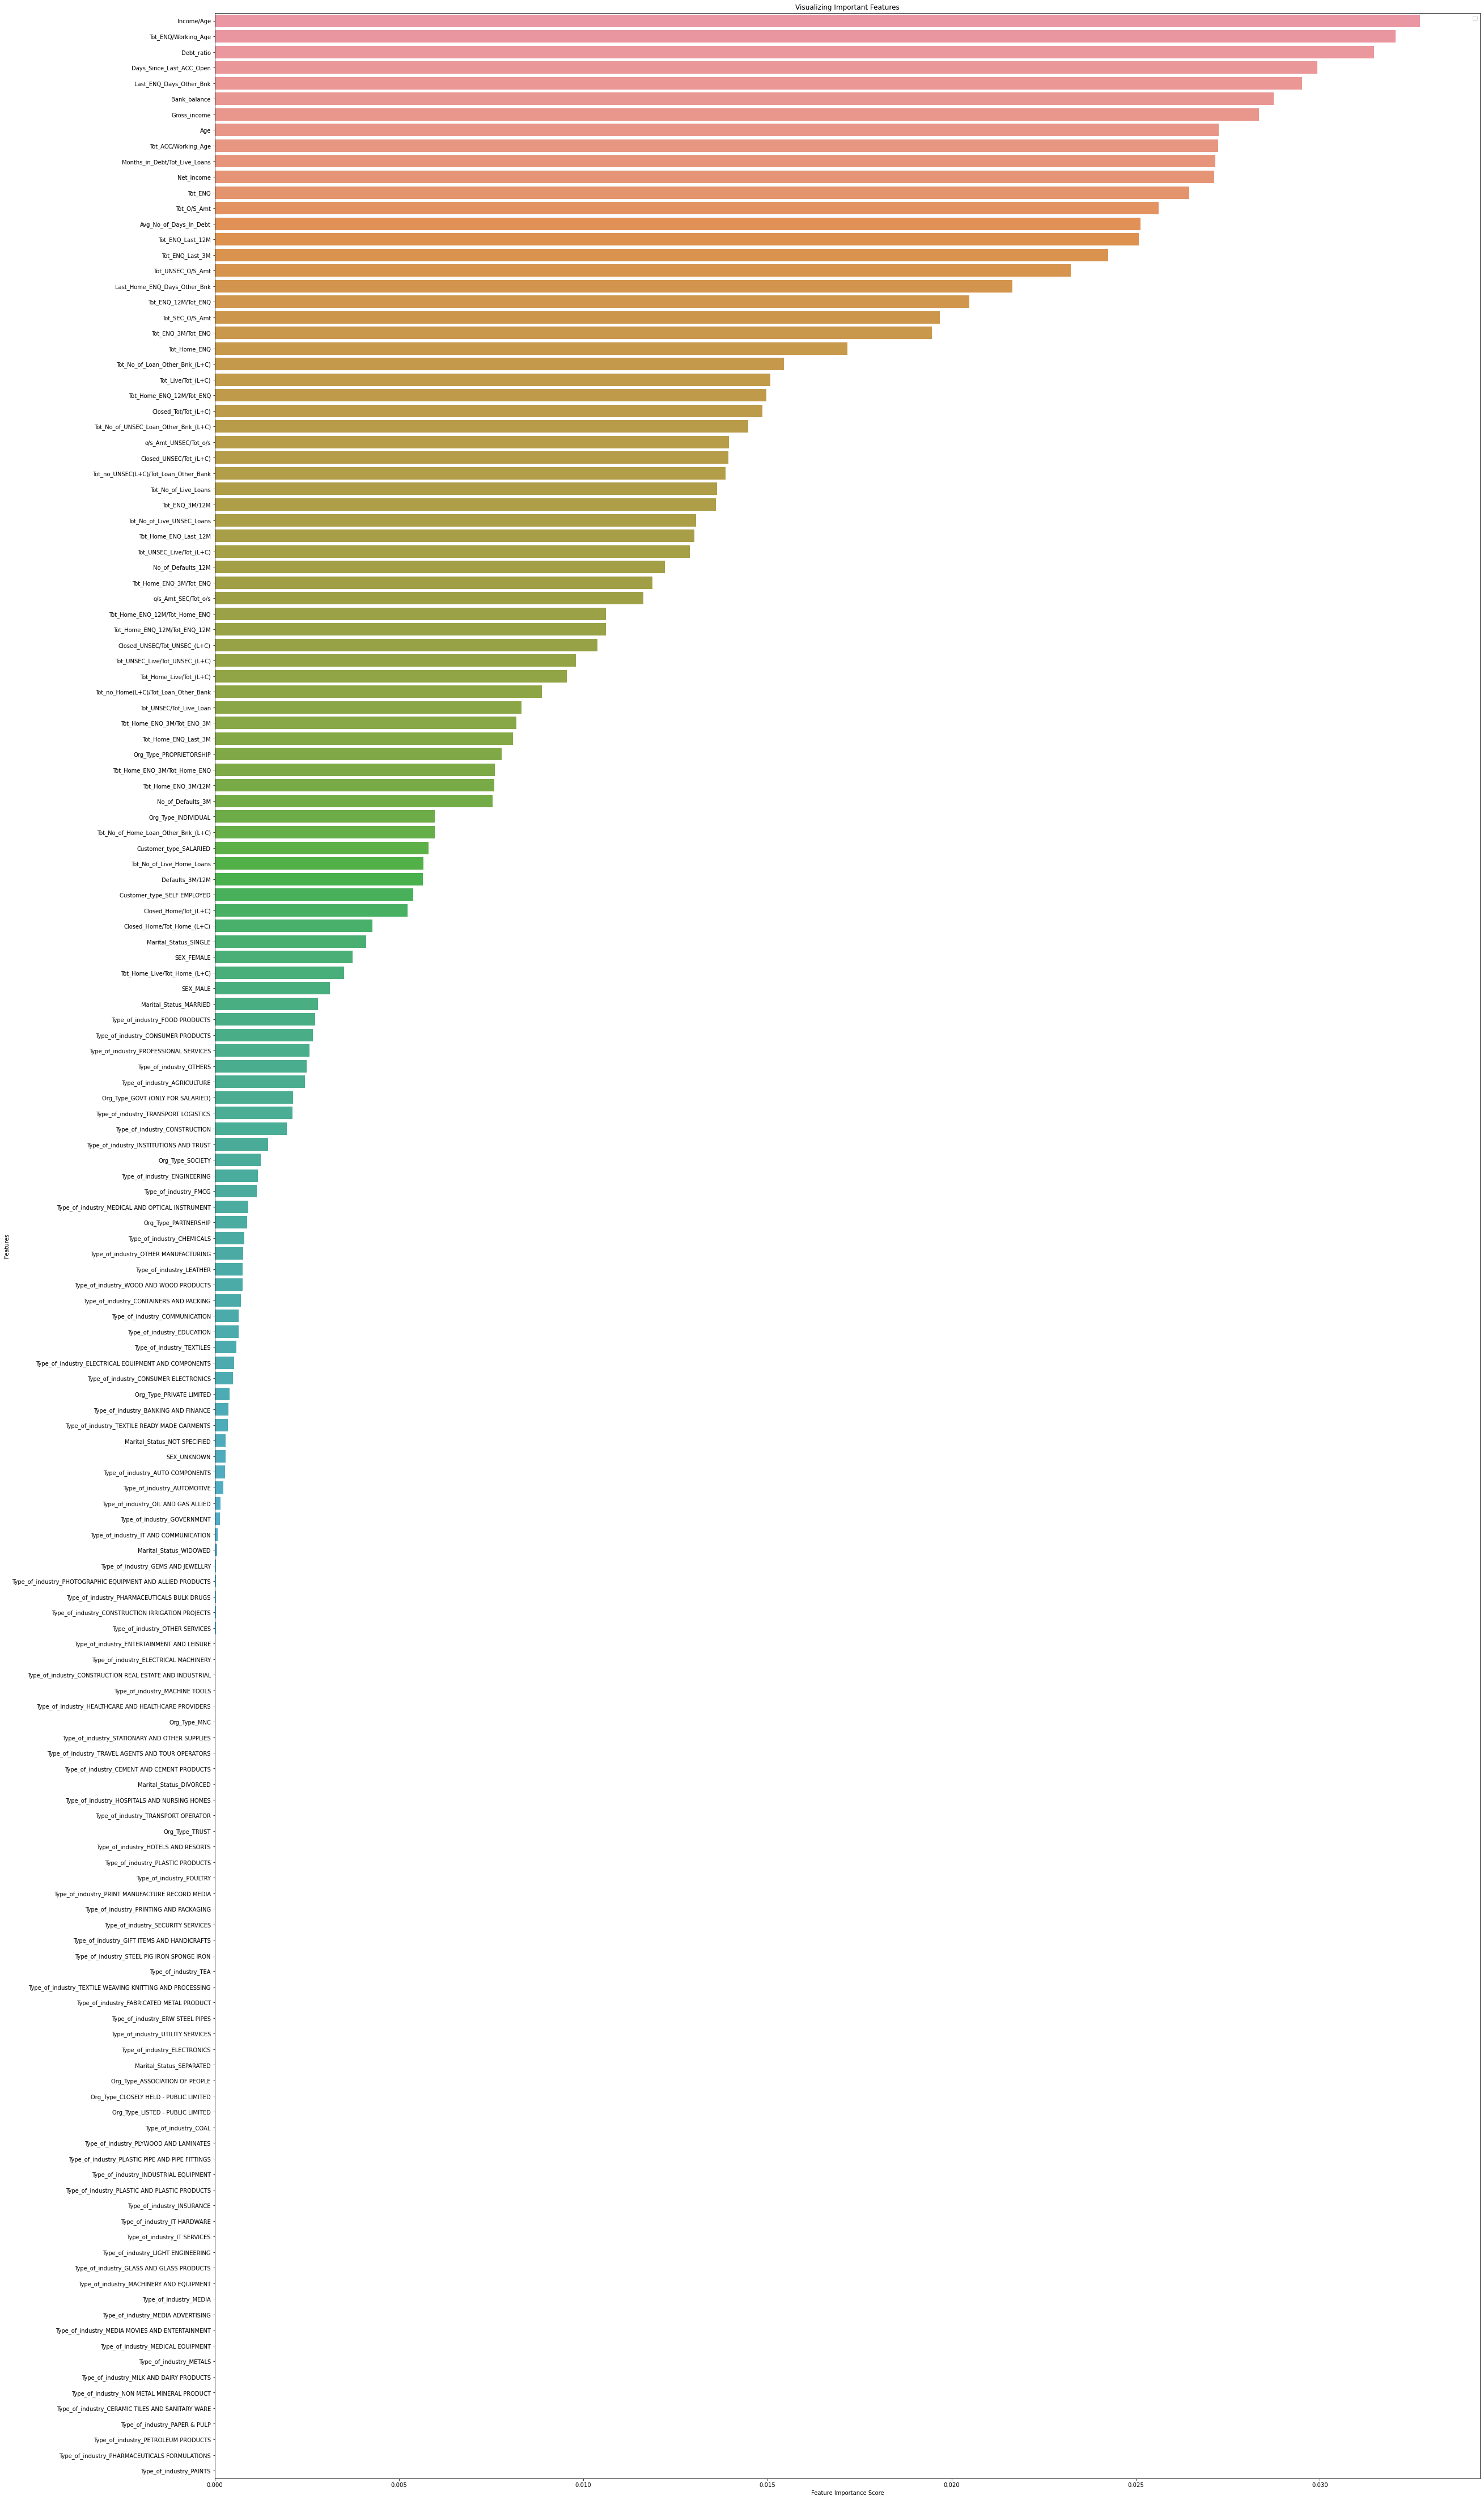

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(40, 80))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [25]:
var_imp = list(pd.DataFrame(feature_imp[0:36].to_dict().keys(), columns = ['Variables'])['Variables'])
var_imp

['Income/Age',
 'Tot_ENQ/Working_Age',
 'Debt_ratio',
 'Days_Since_Last_ACC_Open',
 'Last_ENQ_Days_Other_Bnk',
 'Bank_balance',
 'Gross_income',
 'Age',
 'Tot_ACC/Working_Age',
 'Months_in_Debt/Tot_Live_Loans',
 'Net_income',
 'Tot_ENQ',
 'Tot_O/S_Amt',
 'Avg_No_of_Days_In_Debt',
 'Tot_ENQ_Last_12M',
 'Tot_ENQ_Last_3M',
 'Tot_UNSEC_O/S_Amt',
 'Last_Home_ENQ_Days_Other_Bnk',
 'Tot_ENQ_12M/Tot_ENQ',
 'Tot_SEC_O/S_Amt',
 'Tot_ENQ_3M/Tot_ENQ',
 'Tot_Home_ENQ',
 'Tot_No_of_Loan_Other_Bnk_(L+C)',
 'Tot_Live/Tot_(L+C)',
 'Tot_Home_ENQ_12M/Tot_ENQ',
 'Closed_Tot/Tot_(L+C)',
 'Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)',
 'o/s_Amt_UNSEC/Tot_o/s',
 'Closed_UNSEC/Tot_(L+C)',
 'Tot_no_UNSEC(L+C)/Tot_Loan_Other_Bank',
 'Tot_No_of_Live_Loans',
 'Tot_ENQ_3M/12M',
 'Tot_No_of_Live_UNSEC_Loans',
 'Tot_Home_ENQ_Last_12M',
 'Tot_UNSEC_Live/Tot_(L+C)',
 'No_of_Defaults_12M']

*  BY IV AND WOE : There is no need of ONE-HOT ENCODING IN IV and WOE.

In [26]:
cols = df.dtypes.to_dict()
del [ cols['ID'] , cols['Target'] ]
iv = pd.DataFrame()

for i,j in cols.items():
    
    if j == 'object':
        t = df.pivot_table( index = i , values = 'ID', columns = 'Target', aggfunc = 'count')
        t['Variables'] = i
        t['good_dist'] = t[0]/ t[0].sum()
        t['bad_dist'] = t[1]/ t[1].sum()
        t['IV'] = (t['good_dist'] - t['bad_dist']) * np.log(t['good_dist']/t['bad_dist'])
        t['WOE'] = np.log(t.good_dist / t.bad_dist)
        iv = iv.append(t)
        
    else:
        df['qcut'] =  pd.qcut( df[i] , 5, duplicates = 'drop')
        t = df.pivot_table( index = 'qcut' , values = 'ID', columns = 'Target', aggfunc = 'count')
        t['Variables'] = i
        t['good_dist'] = t[0]/ t[0].sum()
        t['bad_dist'] = t[1]/ t[1].sum()
        t['IV'] = (t['good_dist'] - t['bad_dist']) * np.log(t['good_dist']/t['bad_dist']) 
        t['WOE'] = np.log(t.good_dist / t.bad_dist)
        t = t.reset_index()
        iv = iv.append(t)
        
iv

Target,qcut,0,1,Variables,good_dist,bad_dist,IV,WOE
0,"(1.999, 31.0]",833.0,62.0,Age,0.233072,0.208754,2.679615e-03,0.110191
1,"(31.0, 35.0]",619.0,65.0,Age,0.173195,0.218855,1.068399e-02,-0.233991
2,"(35.0, 40.0]",737.0,49.0,Age,0.206212,0.164983,9.196359e-03,0.223059
3,"(40.0, 46.0]",749.0,59.0,Age,0.209569,0.198653,5.839247e-04,0.053493
4,"(46.0, 71.0]",636.0,62.0,Age,0.177952,0.208754,4.917419e-03,-0.159644
SALARIED,NaN,1606.0,63.0,Customer_type,0.449356,0.212121,1.780827e-01,0.750659
SELF EMPLOYED,NaN,1968.0,234.0,Customer_type,0.550644,0.787879,8.499109e-02,-0.358257
0,"(-0.001, 18846.0]",717.0,58.0,Gross_income,0.200616,0.195286,1.434892e-04,0.026924
1,"(18846.0, 27775.0]",737.0,37.0,Gross_income,0.206212,0.124579,4.113958e-02,0.503961
2,"(27775.0, 39749.0]",723.0,51.0,Gross_income,0.202294,0.171717,5.010836e-03,0.163875


In [27]:
# stick table of IV values

In [28]:

iv_tab = pd.pivot_table(iv,index=['Variables'], aggfunc={'IV':np.sum})
c =iv_tab[iv_tab['IV'] > 0.02].sort_values(by = 'IV', ascending = False)
display(c)

,IV
Variables,
Tot_ENQ_Last_12M,0.290691
Customer_type,0.263074
Tot_ENQ_Last_3M,0.224188
Tot_ENQ,0.193980
Tot_ENQ/Working_Age,0.165532
Org_Type,0.136133
Tot_Home_ENQ_Last_12M,0.123987
Type_of_industry,0.121943
Tot_ENQ_3M/12M,0.116599


In [29]:
# SELECTED VARIABLES FROM IV
a = c.to_dict()
iv_var = []
for i,j in a.items():
    for h,k in j.items():
        iv_var.append(h)
iv_var

['Tot_ENQ_Last_12M',
 'Customer_type',
 'Tot_ENQ_Last_3M',
 'Tot_ENQ',
 'Tot_ENQ/Working_Age',
 'Org_Type',
 'Tot_Home_ENQ_Last_12M',
 'Type_of_industry',
 'Tot_ENQ_3M/12M',
 'Tot_Home_ENQ',
 'Gross_income',
 'Last_ENQ_Days_Other_Bnk',
 'Tot_UNSEC_O/S_Amt',
 'Tot_ENQ_12M/Tot_ENQ',
 'Net_income',
 'Debt_ratio',
 'Tot_Home_ENQ_12M/Tot_ENQ_12M',
 'Tot_ENQ_3M/Tot_ENQ',
 'Income/Age',
 'Tot_No_of_Live_Loans',
 'No_of_Defaults_12M',
 'Days_Since_Last_ACC_Open',
 'Tot_O/S_Amt',
 'Tot_Home_ENQ_Last_3M',
 'Avg_No_of_Days_In_Debt',
 'Tot_No_of_Live_UNSEC_Loans',
 'Closed_Tot/Tot_(L+C)',
 'Tot_No_of_Loan_Other_Bnk_(L+C)',
 'Tot_Home_ENQ_3M/Tot_ENQ',
 'Tot_Home_ENQ_3M/Tot_Home_ENQ',
 'o/s_Amt_UNSEC/Tot_o/s',
 'Tot_Live/Tot_(L+C)',
 'Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)',
 'Tot_No_of_Live_Home_Loans',
 'Age',
 'Months_in_Debt/Tot_Live_Loans',
 'Tot_SEC_O/S_Amt',
 'Tot_UNSEC_Live/Tot_UNSEC_(L+C)',
 'SEX']

In [30]:
del df['qcut']

* BY VARCLUS SELECTION

In [31]:
col_cat = df.select_dtypes( ['object']).columns
data_1 = pd.get_dummies(df, columns = col_cat)
display(data_1.shape)
data_1.head()

(3871, 160)

,ID,Age,Gross_income,Net_income,Bank_balance,Debt_ratio,Target,Last_ENQ_Days_Other_Bnk,Last_Home_ENQ_Days_Other_Bnk,Tot_ENQ_Last_3M,Tot_Home_ENQ_Last_3M,Tot_ENQ_Last_12M,Tot_Home_ENQ_Last_12M,Tot_ENQ,Tot_Home_ENQ,No_of_Defaults_3M,No_of_Defaults_12M,Days_Since_Last_ACC_Open,Tot_No_of_Loan_Other_Bnk_(L+C),Tot_No_of_Home_Loan_Other_Bnk_(L+C),Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C),Tot_No_of_Live_Loans,Tot_No_of_Live_Home_Loans,Tot_No_of_Live_UNSEC_Loans,Tot_O/S_Amt,Tot_SEC_O/S_Amt,Tot_UNSEC_O/S_Amt,Avg_No_of_Days_In_Debt,Income/Age,Tot_ENQ_12M/Tot_ENQ,Tot_ENQ_3M/Tot_ENQ,Tot_Home_ENQ_12M/Tot_Home_ENQ,Tot_Home_ENQ_3M/Tot_Home_ENQ,Tot_ENQ_3M/12M,Tot_Home_ENQ_3M/12M,Tot_Home_ENQ_3M/Tot_ENQ_3M,Tot_Home_ENQ_12M/Tot_ENQ_12M,Tot_ENQ/Working_Age,Tot_Home_ENQ_3M/Tot_ENQ,Tot_Home_ENQ_12M/Tot_ENQ,Defaults_3M/12M,Tot_UNSEC/Tot_Live_Loan,Months_in_Debt/Tot_Live_Loans,o/s_Amt_SEC/Tot_o/s,o/s_Amt_UNSEC/Tot_o/s,Tot_Live/Tot_(L+C),Tot_Home_Live/Tot_Home_(L+C),Tot_UNSEC_Live/Tot_UNSEC_(L+C),Tot_Home_Live/Tot_(L+C),Tot_UNSEC_Live/Tot_(L+C),Tot_ACC/Working_Age,Tot_no_Home(L+C)/Tot_Loan_Other_Bank,Tot_no_UNSEC(L+C)/Tot_Loan_Other_Bank,Closed_Tot/Tot_(L+C),Closed_Home/Tot_(L+C),Closed_Home/Tot_Home_(L+C),Closed_UNSEC/Tot_(L+C),Closed_UNSEC/Tot_UNSEC_(L+C),Customer_type_SALARIED,Customer_type_SELF EMPLOYED,SEX_FEMALE,SEX_MALE,SEX_UNKNOWN,Type_of_industry_AGRICULTURE,Type_of_industry_AUTO COMPONENTS,Type_of_industry_AUTOMOTIVE,Type_of_industry_BANKING AND FINANCE,Type_of_industry_CEMENT AND CEMENT PRODUCTS,Type_of_industry_CERAMIC TILES AND SANITARY WARE,Type_of_industry_CHEMICALS,Type_of_industry_COAL,Type_of_industry_COMMUNICATION,Type_of_industry_CONSTRUCTION,Type_of_industry_CONSTRUCTION IRRIGATION PROJECTS,Type_of_industry_CONSTRUCTION REAL ESTATE AND INDUSTRIAL,Type_of_industry_CONSUMER ELECTRONICS,Type_of_industry_CONSUMER PRODUCTS,Type_of_industry_CONTAINERS AND PACKING,Type_of_industry_EDUCATION,Type_of_industry_ELECTRICAL EQUIPMENT AND COMPONENTS,Type_of_industry_ELECTRICAL MACHINERY,Type_of_industry_ELECTRONICS,Type_of_industry_ENGINEERING,Type_of_industry_ENTERTAINMENT AND LEISURE,Type_of_industry_ERW STEEL PIPES,Type_of_industry_FABRICATED METAL PRODUCT,Type_of_industry_FMCG,Type_of_industry_FOOD PRODUCTS,Type_of_industry_GEMS AND JEWELLRY,Type_of_industry_GIFT ITEMS AND HANDICRAFTS,Type_of_industry_GLASS AND GLASS PRODUCTS,Type_of_industry_GOVERNMENT,Type_of_industry_HEALTHCARE AND HEALTHCARE PROVIDERS,Type_of_industry_HOSPITALS AND NURSING HOMES,Type_of_industry_HOTELS AND RESORTS,Type_of_industry_INDUSTRIAL EQUIPMENT,Type_of_industry_INSTITUTIONS AND TRUST,Type_of_industry_INSURANCE,Type_of_industry_IT AND COMMUNICATION,Type_of_industry_IT HARDWARE,Type_of_industry_IT SERVICES,Type_of_industry_LEATHER,Type_of_industry_LIGHT ENGINEERING,Type_of_industry_MACHINE TOOLS,Type_of_industry_MACHINERY AND EQUIPMENT,Type_of_industry_MEDIA,Type_of_industry_MEDIA ADVERTISING,Type_of_industry_MEDIA MOVIES AND ENTERTAINMENT,Type_of_industry_MEDICAL AND OPTICAL INSTRUMENT,Type_of_industry_MEDICAL EQUIPMENT,Type_of_industry_METALS,Type_of_industry_MILK AND DAIRY PRODUCTS,Type_of_industry_NON METAL MINERAL PRODUCT,Type_of_industry_OIL AND GAS ALLIED,Type_of_industry_OTHER MANUFACTURING,Type_of_industry_OTHER SERVICES,Type_of_industry_OTHERS,Type_of_industry_PAINTS,Type_of_industry_PAPER & PULP,Type_of_industry_PETROLEUM PRODUCTS,Type_of_industry_PHARMACEUTICALS BULK DRUGS,Type_of_industry_PHARMACEUTICALS FORMULATIONS,Type_of_industry_PHOTOGRAPHIC EQUIPMENT AND ALLIED PRODUCTS,Type_of_industry_PLASTIC AND PLASTIC PRODUCTS,Type_of_industry_PLASTIC PIPE AND PIPE FITTINGS,Type_of_industry_PLASTIC PRODUCTS,Type_of_industry_PLYWOOD AND LAMINATES,Type_of_industry_POULTRY,Type_of_industry_PRINT MANUFACTURE RECORD MEDIA,Type_of_industry_PRINTING AND PACKAGING,Type_of_industry_PROFESSIONAL SERVICES,Type_of_industry_SECURITY SERVICES,Type_of_industry_STATIONARY AND OTHER SUPPLIES,Type_of_industry_STEEL PIG IRON SPONGE IRON,Type_of_industry_TEA,Type_of_industry_TEXTILE

In [32]:
# Import the library of varclus
from varclushi import VarClusHi

In [33]:
# DROPPING TARGET VARIABLE
X = data_1.drop(['Target','ID'], axis = 1)

In [34]:
# CLSUTERING VARIABLES
varclus_model = VarClusHi( X, maxeigval2 = 1, maxclus = 35)
varclus_model.varclus()

In [35]:
# VARIABLE SELECTION FOR EACH CLSUTER BASED ON R_Sq RATIO
#RS_RATIO = 1- RS_OWN_CLUSTER / 1- RS_NEXT_CLOSEST_CLUSTER
# SELECT 1 VARIABLE FROM EACH CLUSTER WHICH IS HAVING MINIMUM RS_RATIO.
# can remove ID column afterwards
v = pd.DataFrame(varclus_model.rsquare)

In [36]:
p = pd.DataFrame(varclus_model.info)

In [37]:
dataf1 = pd.DataFrame()
for i in p.loc[p['N_Vars'] > '1']['Cluster'].astype(int).tolist():
    a = v.loc[ v['Cluster'] == i, ['Variable','RS_Ratio','Cluster']]
    t = a.nsmallest( 1, 'RS_Ratio', keep= 'all')
    dataf1 = dataf1.append(pd.DataFrame(t))
display(dataf1)

tab = pd.pivot_table(dataf1,index=['Variable'], aggfunc={'RS_Ratio':np.sum})

,Variable,RS_Ratio,Cluster
0,Tot_No_of_Loan_Other_Bnk_(L+C),0.309234,0
14,Tot_Home_ENQ_3M/Tot_ENQ_3M,0.266444,1
21,Tot_Live/Tot_(L+C),0.212495,2
22,Closed_Tot/Tot_(L+C),0.212495,2
35,Tot_SEC_O/S_Amt,0.305218,3
40,Tot_no_Home(L+C)/Tot_Loan_Other_Bank,0.077856,4
51,Net_income,0.029042,5
55,Marital_Status_SINGLE,0.078366,6
58,No_of_Defaults_3M,0.113294,7
64,SEX_UNKNOWN,0.058025,8


In [38]:
# SELECT THE VARIABLES FROM VARCLUS :
varclus_var = list(dataf1['Variable'])
varclus_var

['Tot_No_of_Loan_Other_Bnk_(L+C)',
 'Tot_Home_ENQ_3M/Tot_ENQ_3M',
 'Tot_Live/Tot_(L+C)',
 'Closed_Tot/Tot_(L+C)',
 'Tot_SEC_O/S_Amt',
 'Tot_no_Home(L+C)/Tot_Loan_Other_Bank',
 'Net_income',
 'Marital_Status_SINGLE',
 'No_of_Defaults_3M',
 'SEX_UNKNOWN',
 'Marital_Status_NOT SPECIFIED',
 'SEX_MALE',
 'o/s_Amt_SEC/Tot_o/s',
 'Customer_type_SALARIED',
 'Customer_type_SELF EMPLOYED',
 'Tot_ENQ_Last_12M',
 'Closed_Home/Tot_(L+C)',
 'Tot_ENQ_3M/Tot_ENQ',
 'Type_of_industry_CONTAINERS AND PACKING',
 'Days_Since_Last_ACC_Open',
 'Type_of_industry_OTHERS',
 'Tot_UNSEC_Live/Tot_(L+C)',
 'Org_Type_INDIVIDUAL',
 'Org_Type_PRIVATE LIMITED',
 'Org_Type_PROPRIETORSHIP',
 'Type_of_industry_WOOD AND WOOD PRODUCTS',
 'Type_of_industry_LEATHER',
 'Org_Type_GOVT (ONLY FOR SALARIED)',
 'Org_Type_CLOSELY HELD - PUBLIC LIMITED']

In [39]:
from collections import Counter
selected_vars = var_imp + iv_var + varclus_var
duplicate_dict = Counter(selected_vars)
duplicate_dict

Counter({'Income/Age': 2,
         'Tot_ENQ/Working_Age': 2,
         'Debt_ratio': 2,
         'Days_Since_Last_ACC_Open': 3,
         'Last_ENQ_Days_Other_Bnk': 2,
         'Bank_balance': 1,
         'Gross_income': 2,
         'Age': 2,
         'Tot_ACC/Working_Age': 1,
         'Months_in_Debt/Tot_Live_Loans': 2,
         'Net_income': 3,
         'Tot_ENQ': 2,
         'Tot_O/S_Amt': 2,
         'Avg_No_of_Days_In_Debt': 2,
         'Tot_ENQ_Last_12M': 3,
         'Tot_ENQ_Last_3M': 2,
         'Tot_UNSEC_O/S_Amt': 2,
         'Last_Home_ENQ_Days_Other_Bnk': 1,
         'Tot_ENQ_12M/Tot_ENQ': 2,
         'Tot_SEC_O/S_Amt': 3,
         'Tot_ENQ_3M/Tot_ENQ': 3,
         'Tot_Home_ENQ': 2,
         'Tot_No_of_Loan_Other_Bnk_(L+C)': 3,
         'Tot_Live/Tot_(L+C)': 3,
         'Tot_Home_ENQ_12M/Tot_ENQ': 1,
         'Closed_Tot/Tot_(L+C)': 3,
         'Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)': 2,
         'o/s_Amt_UNSEC/Tot_o/s': 2,
         'Closed_UNSEC/Tot_(L+C)': 1,
         'Tot_

> THESE ARE THE SELECTED VARIABLES

In [40]:
#list_1 = ['Tot_ENQ/Working_Age','Debt_ratio', 'Days_Since_Last_ACC_Open','Target','Bank_balance','Tot_UNSEC_Live/Tot_(L+C)','Tot_ENQ_12M/Tot_ENQ',]
list_1 = ['Target','Bank_balance','Customer_type']
for i,j in duplicate_dict.items():
    if j >= 2:
        list_1.append(i)
    else:
        pass
(list_1)

# drop closed_tot/tot(l+c) and Net_income not needed

['Target',
 'Bank_balance',
 'Customer_type',
 'Income/Age',
 'Tot_ENQ/Working_Age',
 'Debt_ratio',
 'Days_Since_Last_ACC_Open',
 'Last_ENQ_Days_Other_Bnk',
 'Gross_income',
 'Age',
 'Months_in_Debt/Tot_Live_Loans',
 'Net_income',
 'Tot_ENQ',
 'Tot_O/S_Amt',
 'Avg_No_of_Days_In_Debt',
 'Tot_ENQ_Last_12M',
 'Tot_ENQ_Last_3M',
 'Tot_UNSEC_O/S_Amt',
 'Tot_ENQ_12M/Tot_ENQ',
 'Tot_SEC_O/S_Amt',
 'Tot_ENQ_3M/Tot_ENQ',
 'Tot_Home_ENQ',
 'Tot_No_of_Loan_Other_Bnk_(L+C)',
 'Tot_Live/Tot_(L+C)',
 'Closed_Tot/Tot_(L+C)',
 'Tot_No_of_UNSEC_Loan_Other_Bnk_(L+C)',
 'o/s_Amt_UNSEC/Tot_o/s',
 'Tot_No_of_Live_Loans',
 'Tot_ENQ_3M/12M',
 'Tot_No_of_Live_UNSEC_Loans',
 'Tot_Home_ENQ_Last_12M',
 'Tot_UNSEC_Live/Tot_(L+C)',
 'No_of_Defaults_12M']

In [41]:
logical_data = df[['Tot_ENQ/Working_Age','Days_Since_Last_ACC_Open',
               'Debt_ratio','Last_ENQ_Days_Other_Bnk','Bank_balance',
               'Avg_No_of_Days_In_Debt','Tot_O/S_Amt','Tot_ENQ_12M/Tot_ENQ',
               'Tot_ENQ_Last_3M','Tot_UNSEC_O/S_Amt','Tot_No_of_Loan_Other_Bnk_(L+C)','Tot_Home_ENQ_Last_12M',
               'o/s_Amt_UNSEC/Tot_o/s','Target','Customer_type']]

In [42]:
logical_data.head()

,Tot_ENQ/Working_Age,Days_Since_Last_ACC_Open,Debt_ratio,Last_ENQ_Days_Other_Bnk,Bank_balance,Avg_No_of_Days_In_Debt,Tot_O/S_Amt,Tot_ENQ_12M/Tot_ENQ,Tot_ENQ_Last_3M,Tot_UNSEC_O/S_Amt,Tot_No_of_Loan_Other_Bnk_(L+C),Tot_Home_ENQ_Last_12M,o/s_Amt_UNSEC/Tot_o/s,Target,Customer_type
0,0.700000,1486,0.19,324,37806.0,5311,275606,0.071429,0,275606,9,0,1.000000,0,SALARIED
1,0.733333,1912,0.42,616,15499.0,5289,4844,0.000000,0,20,8,0,0.004129,0,SALARIED
2,0.115385,681,0.34,688,15034.0,5153,15695,0.000000,0,0,4,0,0.000000,0,SALARIED
3,0.103448,5143,0.08,52,27349.0,5143,480051,1.000000,2,0,1,2,0.000000,0,SALARIED
4,0.080000,3310,0.48,33,28520.0,5093,2781,0.500000,1,0,2,0,0.000000,0,SELF EMPLOYED


In [43]:
logical_data.shape

(3871, 15)

In [44]:
data = pd.get_dummies(logical_data)
print(data.shape)

(3871, 16)


In [45]:
# LASSO REGRESSION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data.drop(['Target'], axis = 1), data.Target, test_size= 0.3, random_state=42)

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

In [47]:
lasso.fit(X_train,y_train)

Lasso()

In [48]:
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.01560438181194379, 0.01314355724251659)

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(y_train,order='C'))
sel_.get_support()

array([ True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False])

In [50]:
X_train = pd.DataFrame(X_train)

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)
X_train_selected.shape, X_test_selected.shape

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 15
selected features: 10


In [51]:
selected_feat

Index(['Tot_ENQ/Working_Age', 'Days_Since_Last_ACC_Open',
       'Last_ENQ_Days_Other_Bnk', 'Avg_No_of_Days_In_Debt',
       'Tot_ENQ_12M/Tot_ENQ', 'Tot_ENQ_Last_3M',
       'Tot_No_of_Loan_Other_Bnk_(L+C)', 'Tot_Home_ENQ_Last_12M',
       'o/s_Amt_UNSEC/Tot_o/s', 'Customer_type_SALARIED'],
      dtype='object')

In [52]:
X_train = X_train[selected_feat]

X_test = X_test[selected_feat]

In [53]:
X_train.shape

model = LogisticRegression()
model.fit(X_train,y_train)
#print(model.predict_proba(X))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

train = pd.concat([X_train,y_train], axis = 1)

test = pd.concat([X_test,y_test], axis = 1)

0.9243263196751569
0.9216867469879518


In [54]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

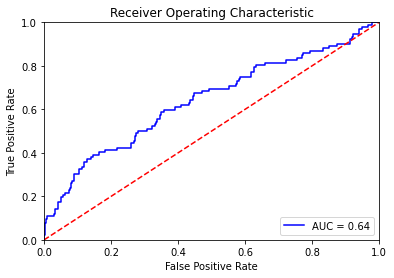

In [55]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
act = model.predict(X_train)


array([0, 1], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = model.predict(y_train)
# predicted values
predicted = model.predict(X_train)

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
# Confusion Matrix
#Predicting the train set result
y_train_pred= model.predict(X_train)

In [70]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_train= confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train Data \n",cm_train)

Confusion Matrix for Train Data 
 [[2499    5]
 [ 200    5]]


Train Data


<AxesSubplot:>

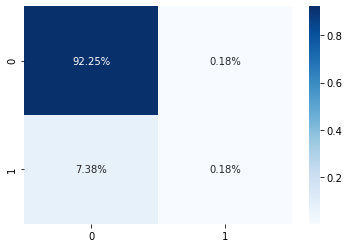

In [76]:
import seaborn as sns
print("Train Data")
sns.heatmap(cm_train/np.sum(cm_train), annot=True, fmt='.2%', cmap='Blues')

In [71]:
# Confusion Matrix
#Predicting the test set result
y_test_pred= model.predict(X_test)

In [73]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_test= confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Data \n",cm_test)

Confusion Matrix for Test Data 
 [[1070    0]
 [  91    1]]


Test Data


<AxesSubplot:>

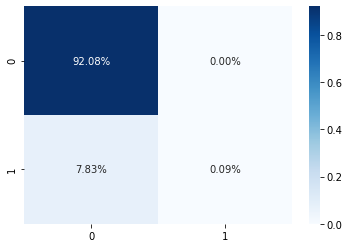

In [77]:
import seaborn as sns
print("Test Data")
sns.heatmap(cm_test/np.sum(cm_test), annot=True, fmt='.2%', cmap='Blues')

In [54]:
PD_train = pd.DataFrame({'Defaulter':train['Target'] ,'Prob_Def': model.predict_proba(X_train)[:,1]})
PD_test = pd.DataFrame({'Defaulter':test['Target'],'Prob_Def': model.predict_proba(X_test)[:,1]})

In [55]:
PD_train['decile'] = pd.qcut(PD_train['Prob_Def'],10,labels=['1','2','3','4','5','6','7','8','9','10'], duplicates = 'drop')
PD_test['decile'] = pd.qcut(PD_test['Prob_Def'],10,labels=['1','2','3','4','5','6','7','8','9','10'], duplicates = 'drop')

In [56]:
PD_train['Non-Defaulter'] = 1-PD_train['Defaulter']
PD_test['Non-Defaulter'] = 1-PD_test['Defaulter']

In [57]:
display(pd.pivot_table(data=PD_train,index=['decile'],values=['Defaulter','Non-Defaulter','Prob_Def'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Prob_Def' : [np.min , np.max]
                             }))

Defaulter Non-Defaulter  Prob_Def          
             sum           sum      amax      amin
decile                                            
1              5           266  0.020985  0.000050
2              9           262  0.030280  0.021008
3              9           262  0.040321  0.030456
4             14           257  0.050584  0.040362
5             11           260  0.064183  0.050608
6             25           245  0.080596  0.064205
7             18           253  0.097866  0.080752
8             35           236  0.119200  0.097912
9             26           245  0.151387  0.119340
10            53           218  0.823823  0.151883

In [58]:
display(pd.pivot_table(data = PD_test,index=['decile'],values=['Defaulter','Non-Defaulter','Prob_Def'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Prob_Def' : [np.min , np.max]
                             }))

Defaulter Non-Defaulter  Prob_Def          
             sum           sum      amax      amin
decile                                            
1              9           108  0.019761  0.000214
2              4           112  0.028375  0.019926
3              4           112  0.038459  0.028380
4              6           110  0.047790  0.038486
5              6           110  0.060759  0.047902
6              8           108  0.075529  0.060896
7              9           107  0.094513  0.075554
8              8           109  0.118405  0.095083
9             13           102  0.148039  0.118663
10            25            92  0.598721  0.148333

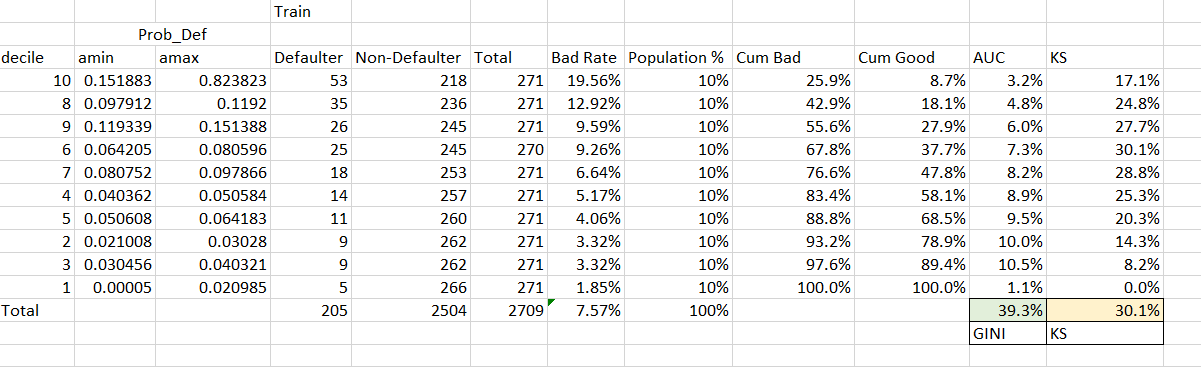

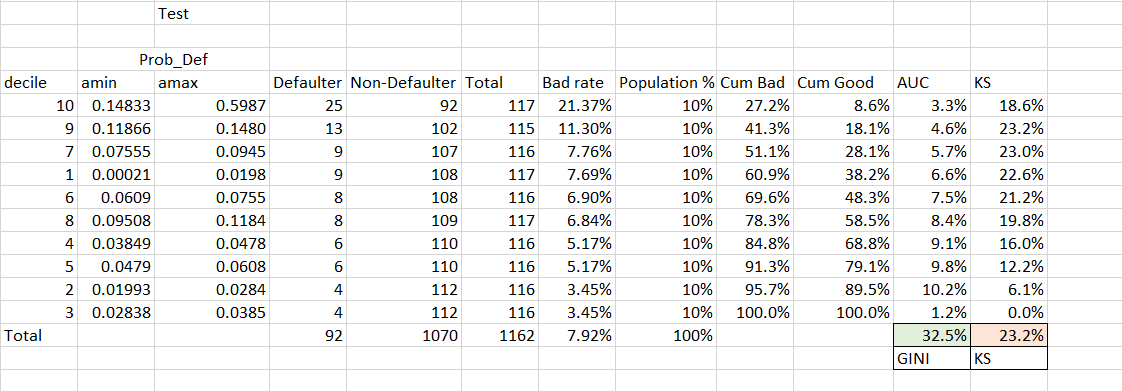

* Trend Of all these variables TEST AND TRAIN

In [59]:
train.head()

,Tot_ENQ/Working_Age,Days_Since_Last_ACC_Open,Last_ENQ_Days_Other_Bnk,Avg_No_of_Days_In_Debt,Tot_ENQ_12M/Tot_ENQ,Tot_ENQ_Last_3M,Tot_No_of_Loan_Other_Bnk_(L+C),Tot_Home_ENQ_Last_12M,o/s_Amt_UNSEC/Tot_o/s,Customer_type_SALARIED,Target
1081,0.500000,541,38,743,0.100000,1,6,1,0.000000,0,0
3302,0.200000,94,78,94,1.000000,1,1,0,1.000000,1,0
22,0.066667,2025,3686,4078,0.000000,0,2,0,0.000000,1,0
2868,0.176471,150,20,217,1.000000,1,3,1,0.000000,0,1
2574,0.250000,121,34,290,0.833333,3,2,1,0.556553,0,0


In [60]:
test.head()

,Tot_ENQ/Working_Age,Days_Since_Last_ACC_Open,Last_ENQ_Days_Other_Bnk,Avg_No_of_Days_In_Debt,Tot_ENQ_12M/Tot_ENQ,Tot_ENQ_Last_3M,Tot_No_of_Loan_Other_Bnk_(L+C),Tot_Home_ENQ_Last_12M,o/s_Amt_UNSEC/Tot_o/s,Customer_type_SALARIED,Target
3299,0.333333,95,116,95,0.500000,0,2,2,0.000000,0,0
3841,0.111111,768,21,0,0.500000,1,3,1,0.000000,1,0
2354,3.923077,82,10,343,0.470588,8,13,1,0.805539,1,0
2568,0.666667,293,26,293,1.000000,2,2,1,0.000000,1,1
3293,0.375000,31,22,97,1.000000,5,3,3,0.327518,1,0


In [58]:
train['cnt']= 1
test['cnt'] =1

In [59]:
col1 = train.dtypes.to_dict()
col2 = test.dtypes.to_dict()

In [60]:
display(col1)
display(col2)

{'Tot_ENQ/Working_Age': dtype('float64'),
 'Days_Since_Last_ACC_Open': dtype('int64'),
 'Last_ENQ_Days_Other_Bnk': dtype('int64'),
 'Avg_No_of_Days_In_Debt': dtype('int64'),
 'Tot_ENQ_12M/Tot_ENQ': dtype('float64'),
 'Tot_ENQ_Last_3M': dtype('int64'),
 'Tot_No_of_Loan_Other_Bnk_(L+C)': dtype('int64'),
 'Tot_Home_ENQ_Last_12M': dtype('int64'),
 'o/s_Amt_UNSEC/Tot_o/s': dtype('float64'),
 'Customer_type_SALARIED': dtype('uint8'),
 'Target': dtype('int64'),
 'cnt': dtype('int64')}

{'Tot_ENQ/Working_Age': dtype('float64'),
 'Days_Since_Last_ACC_Open': dtype('int64'),
 'Last_ENQ_Days_Other_Bnk': dtype('int64'),
 'Avg_No_of_Days_In_Debt': dtype('int64'),
 'Tot_ENQ_12M/Tot_ENQ': dtype('float64'),
 'Tot_ENQ_Last_3M': dtype('int64'),
 'Tot_No_of_Loan_Other_Bnk_(L+C)': dtype('int64'),
 'Tot_Home_ENQ_Last_12M': dtype('int64'),
 'o/s_Amt_UNSEC/Tot_o/s': dtype('float64'),
 'Customer_type_SALARIED': dtype('uint8'),
 'Target': dtype('int64'),
 'cnt': dtype('int64')}

In [61]:
del [ col1['Target'] , col1['cnt'] ]
del [ col2['Target'] , col2['cnt']]

In [62]:
iv1 = pd.DataFrame()
err = []

for i,j in col1.items():

    try :
        
        if j == 'object':
            t = train.pivot_table( index = i , values = 'ID', columns = 'Target', aggfunc = 'count')
            t['total'] = t[1]+t[0]
            t['def_rate'] = t[1]/(t[1]+t[0])*100
            t['Variables'] = i
            t = t.reset_index()
            iv1 = iv1.append(t)  
        
        else:
            train['qcut'] =  pd.qcut( train[i] , 10, duplicates = 'drop')
            t = train.pivot_table( index = 'qcut' , values = 'cnt', columns = 'Target', aggfunc = 'count')
            t['total'] = t[1]+t[0]
            t['def_rate'] = t[1]/(t[1]+t[0])*100
            t['Variables'] = i
            t = t.reset_index()
            iv1 = iv1.append(t)
            
    except :
        err.append(i)
        
iv1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Target,qcut,0,1,total,def_rate,Variables
0,"(-1.279, 0.0645]",258.0,14.0,272.0,5.147059,Tot_ENQ/Working_Age
1,"(0.0645, 0.125]",286.0,15.0,301.0,4.983389,Tot_ENQ/Working_Age
2,"(0.125, 0.182]",245.0,10.0,255.0,3.921569,Tot_ENQ/Working_Age
3,"(0.182, 0.25]",271.0,14.0,285.0,4.912281,Tot_ENQ/Working_Age
4,"(0.25, 0.353]",229.0,18.0,247.0,7.287449,Tot_ENQ/Working_Age
...,...,...,...,...,...,...
1,"(0.0231, 0.225]",248.0,22.0,270.0,8.148148,o/s_Amt_UNSEC/Tot_o/s
2,"(0.225, 0.836]",238.0,33.0,271.0,12.177122,o/s_Amt_UNSEC/Tot_o/s
3,"(0.836, 1.0]",755.0,57.0,812.0,7.019704,o/s_Amt_UNSEC/Tot_o/s
4,"(1.0, 1.134]",1.0,NaN,NaN,NaN,o/s_Amt_UNSEC/Tot_o/s


In [63]:
table = test.loc[test['Days_Since_Last_ACC_Open'] <= 69.0].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Days_Since_Last_ACC_Open')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Days_Since_Last_ACC_Open'] > 69.0)&(test['Days_Since_Last_ACC_Open'] <= 307.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Days_Since_Last_ACC_Open')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Days_Since_Last_ACC_Open'] > 307.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Days_Since_Last_ACC_Open')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Days_Since_Last_ACC_Open,94,9,8.737864


Target,0,1,Def_rate
Days_Since_Last_ACC_Open,437,52,10.633947


Target,0,1,Def_rate
Days_Since_Last_ACC_Open,539,31,5.438596


In [64]:
table = test.loc[test['Tot_ENQ_12M/Tot_ENQ'] <= 0.2].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_12M/Tot_ENQ')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ_12M/Tot_ENQ'] > 0.2)&(test['Tot_ENQ_12M/Tot_ENQ'] <= 0.308)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_12M/Tot_ENQ')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ_12M/Tot_ENQ'] > 0.308)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_12M/Tot_ENQ')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Tot_ENQ_12M/Tot_ENQ,350,22,5.913978


Target,0,1,Def_rate
Tot_ENQ_12M/Tot_ENQ,125,12,8.759124


Target,0,1,Def_rate
Tot_ENQ_12M/Tot_ENQ,595,58,8.882083


In [65]:
table = test.loc[test['Avg_No_of_Days_In_Debt'] <= 688].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Avg_No_of_Days_In_Debt')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Avg_No_of_Days_In_Debt'] > 688)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Avg_No_of_Days_In_Debt')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Avg_No_of_Days_In_Debt,708,70,8.997429


Target,0,1,Def_rate
Avg_No_of_Days_In_Debt,362,22,5.729167


In [66]:
table = test.loc[test['Tot_ENQ_Last_3M'] <= 2.0].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_Last_3M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ_Last_3M'] > 2.0)&(test['Tot_ENQ_Last_3M'] <= 4.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_Last_3M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ_Last_3M'] > 4.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ_Last_3M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Tot_ENQ_Last_3M,872,59,6.337272


Target,0,1,Def_rate
Tot_ENQ_Last_3M,141,12,7.843137


Target,0,1,Def_rate
Tot_ENQ_Last_3M,57,21,26.923077


In [67]:
table = test.loc[test['Tot_Home_ENQ_Last_12M'] <= 2.0].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_Home_ENQ_Last_12M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_Home_ENQ_Last_12M'] > 2.0)&(test['Tot_Home_ENQ_Last_12M'] <= 3.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_Home_ENQ_Last_12M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_Home_ENQ_Last_12M'] > 3.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_Home_ENQ_Last_12M')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Tot_Home_ENQ_Last_12M,900,66,6.832298


Target,0,1,Def_rate
Tot_Home_ENQ_Last_12M,76,12,13.636364


Target,0,1,Def_rate
Tot_Home_ENQ_Last_12M,94,14,12.962963


In [68]:
table = test.loc[test['Tot_ENQ/Working_Age'] <= 0.25].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ/Working_Age')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ/Working_Age'] > 0.25)&(test['Tot_ENQ/Working_Age'] <= 1)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ/Working_Age')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_ENQ/Working_Age'] > 1.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_ENQ/Working_Age')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Tot_ENQ/Working_Age,423,32,7.032967


Target,0,1,Def_rate
Tot_ENQ/Working_Age,463,30,6.085193


Target,0,1,Def_rate
Tot_ENQ/Working_Age,184,30,14.018692


In [69]:
table = test.loc[test['Last_ENQ_Days_Other_Bnk'] <= 22.0].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Last_ENQ_Days_Other_Bnk')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Last_ENQ_Days_Other_Bnk'] > 22.0)&(test['Last_ENQ_Days_Other_Bnk'] <= 219.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Last_ENQ_Days_Other_Bnk')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Last_ENQ_Days_Other_Bnk'] > 219.0)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Last_ENQ_Days_Other_Bnk')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Last_ENQ_Days_Other_Bnk,408,41,9.131403


Target,0,1,Def_rate
Last_ENQ_Days_Other_Bnk,429,34,7.343413


Target,0,1,Def_rate
Last_ENQ_Days_Other_Bnk,233,17,6.8


In [70]:
table = test.loc[test['Tot_No_of_Loan_Other_Bnk_(L+C)'] <= 9].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_No_of_Loan_Other_Bnk_(L+C)')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['Tot_No_of_Loan_Other_Bnk_(L+C)'] > 9)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'Tot_No_of_Loan_Other_Bnk_(L+C)')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
Tot_No_of_Loan_Other_Bnk_(L+C),866,69,7.379679


Target,0,1,Def_rate
Tot_No_of_Loan_Other_Bnk_(L+C),204,23,10.132159


In [71]:
table = test.loc[test['o/s_Amt_UNSEC/Tot_o/s'] <= 0.0231].pivot_table(columns = 'Target',aggfunc = 'count', values = 'o/s_Amt_UNSEC/Tot_o/s')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

table = test.loc[(test['o/s_Amt_UNSEC/Tot_o/s'] > 0.0231)].pivot_table(columns = 'Target',aggfunc = 'count', values = 'o/s_Amt_UNSEC/Tot_o/s')
table['Def_rate'] = table[1]/(table[1]+table[0])*100
display(table)

Target,0,1,Def_rate
o/s_Amt_UNSEC/Tot_o/s,537,34,5.954466


Target,0,1,Def_rate
o/s_Amt_UNSEC/Tot_o/s,533,58,9.813875


In [73]:
train_bin = pd.DataFrame()
test_bin = pd.DataFrame()

test_bin['Target'] = test['Target']
train_bin['Target'] = train['Target']

train_bin['bin_Customer_type'] = train['Customer_type_SALARIED']
test_bin['bin_Customer_type_SALARIED'] = test['Customer_type_SALARIED']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
train_bin['bin_Tot_ENQ/Working_Age'] = np.where( train['Tot_ENQ/Working_Age']<=0.25, 4.76 ,
                                        np.where( (train['Tot_ENQ/Working_Age'] <=1) & (train['Tot_ENQ/Working_Age'] > 0.25), 7.44, 14.17))
test_bin['bin_Tot_ENQ/Working_Age'] = np.where( test['Tot_ENQ/Working_Age']<=0.25, 7.03 ,
                                        np.where( (test['Tot_ENQ/Working_Age'] <=1) & (test['Tot_ENQ/Working_Age'] > 0.25), 6.08,14.01))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
train_bin['bin_Days_Since_Last_ACC_Open'] = np.where(train['Days_Since_Last_ACC_Open']<= 69,12.32,
                                        np.where((train['Days_Since_Last_ACC_Open'] <= 307.0) &(train['Days_Since_Last_ACC_Open'] > 69),8.03,6.22))

test_bin['bin_Days_Since_Last_ACC_Open'] = np.where(test['Days_Since_Last_ACC_Open']<= 69,8.7,
                                        np.where((test['Days_Since_Last_ACC_Open'] <= 307.0) &(test['Days_Since_Last_ACC_Open'] > 69),10.6,5.4))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
train_bin['bin_o/s_Amt_UNSEC/Tot_o/s']=np.where(train['o/s_Amt_UNSEC/Tot_o/s']<= 0.0231,6.86,8.27)
test_bin['bin_o/s_Amt_UNSEC/Tot_o/s']=np.where(test['o/s_Amt_UNSEC/Tot_o/s']<= 0.0231,5.95,9.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
train_bin['bin_Last_ENQ_Days_Other_Bnk']=np.where(train['Last_ENQ_Days_Other_Bnk'] <= 22.0 , 10.09,
        np.where((train['Last_ENQ_Days_Other_Bnk']>22.0) & (train['Last_ENQ_Days_Other_Bnk'] <= 219.0), 7.12, 3.33))

test_bin['bin_Last_ENQ_Days_Other_Bnk']=np.where(test['Last_ENQ_Days_Other_Bnk'] <= 22.0 , 9.13,
        np.where((test['Last_ENQ_Days_Other_Bnk']>22.0) & (test['Last_ENQ_Days_Other_Bnk'] <= 219.0), 7.3, 6.8))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
train_bin['bin_Tot_No_of_Loan_Other_Bnk_(L+C)']=np.where(train['Tot_No_of_Loan_Other_Bnk_(L+C)'] <= 9, 6.77,11.27)
test_bin['bin_Tot_No_of_Loan_Other_Bnk_(L+C)']=np.where(test['Tot_No_of_Loan_Other_Bnk_(L+C)'] <= 9, 7.3,10.1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
train_bin['bin_Avg_No_of_Days_In_Debt']=np.where( train['Avg_No_of_Days_In_Debt'] <= 688.0, 8.01, 6.54)
test_bin['bin_Avg_No_of_Days_In_Debt']=np.where( test['Avg_No_of_Days_In_Debt'] <= 688.0, 8.9, 5.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
train_bin['bin_Tot_ENQ_12M/Tot_ENQ'] = np.where(train['Tot_ENQ_12M/Tot_ENQ'] <= 0.2, 4.65, 
                                         np.where((train['Tot_ENQ_12M/Tot_ENQ']>0.2) & (train['Tot_ENQ_12M/Tot_ENQ'] <= 0.308), 7.52,
                                                  9.05))
test_bin['bin_Tot_ENQ_12M/Tot_ENQ'] = np.where(test['Tot_ENQ_12M/Tot_ENQ'] <= 0.2, 5.9, 
                                         np.where((test['Tot_ENQ_12M/Tot_ENQ']>0.2) & (test['Tot_ENQ_12M/Tot_ENQ'] <= 0.308), 8.75,
                                                  8.8))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
train_bin['bin_Tot_Home_ENQ_Last_12M']=np.where( train['Tot_Home_ENQ_Last_12M'] <= 2.0, 6.2,
                                               np.where((train['Tot_Home_ENQ_Last_12M'] > 2) & (train['Tot_Home_ENQ_Last_12M'] <= 3),9.42, 17.44))
test_bin['bin_Tot_Home_ENQ_Last_12M']=np.where( test['Tot_Home_ENQ_Last_12M'] <= 2.0, 6.2,
                                               np.where((test['Tot_Home_ENQ_Last_12M'] > 2) & (test['Tot_Home_ENQ_Last_12M'] <= 3),9.42, 17.44))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
train_bin['bin_Tot_ENQ_Last_3M']=np.where( train['Tot_ENQ_Last_3M'] <= 2, 5.64, 
                                    np.where((train['Tot_ENQ_Last_3M']> 2) & (train['Tot_ENQ_Last_3M'] <=4 ), 12.35, 20.81))


test_bin['bin_Tot_ENQ_Last_3M']=np.where( test['Tot_ENQ_Last_3M'] <= 2, 5.64, 
                                    np.where((test['Tot_ENQ_Last_3M']> 2) & (test['Tot_ENQ_Last_3M'] <=4 ), 12.35, 20.81))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
train_bin.head()

,Target,bin_Customer_type,bin_Tot_ENQ/Working_Age,bin_Days_Since_Last_ACC_Open,bin_o/s_Amt_UNSEC/Tot_o/s,bin_Last_ENQ_Days_Other_Bnk,bin_Tot_No_of_Loan_Other_Bnk_(L+C),bin_Avg_No_of_Days_In_Debt,bin_Tot_ENQ_12M/Tot_ENQ,bin_Tot_Home_ENQ_Last_12M,bin_Tot_ENQ_Last_3M
1081,0,0,7.44,6.22,6.86,7.12,6.77,6.54,4.65,6.2,5.64
3302,0,1,4.76,8.03,8.27,7.12,6.77,8.01,9.05,6.2,5.64
22,0,1,4.76,6.22,6.86,3.33,6.77,6.54,4.65,6.2,5.64
2868,1,0,4.76,8.03,6.86,10.09,6.77,8.01,9.05,6.2,5.64
2574,0,0,4.76,8.03,8.27,7.12,6.77,8.01,9.05,6.2,12.35


In [84]:
test_bin.head()

,Target,bin_Customer_type_SALARIED,bin_Tot_ENQ/Working_Age,bin_Days_Since_Last_ACC_Open,bin_o/s_Amt_UNSEC/Tot_o/s,bin_Last_ENQ_Days_Other_Bnk,bin_Tot_No_of_Loan_Other_Bnk_(L+C),bin_Avg_No_of_Days_In_Debt,bin_Tot_ENQ_12M/Tot_ENQ,bin_Tot_Home_ENQ_Last_12M,bin_Tot_ENQ_Last_3M
3299,0,0,6.08,10.6,5.95,7.30,7.3,8.9,8.8,6.20,5.64
3841,0,1,7.03,5.4,5.95,9.13,7.3,8.9,8.8,6.20,5.64
2354,0,1,14.01,10.6,9.80,9.13,10.1,8.9,8.8,6.20,20.81
2568,1,1,6.08,10.6,5.95,7.30,7.3,8.9,8.8,6.20,5.64
3293,0,1,6.08,8.7,9.80,9.13,7.3,8.9,8.8,9.42,20.81


In [85]:
train_bin.isna().sum()

Target                                0
bin_Customer_type                     0
bin_Tot_ENQ/Working_Age               0
bin_Days_Since_Last_ACC_Open          0
bin_o/s_Amt_UNSEC/Tot_o/s             0
bin_Last_ENQ_Days_Other_Bnk           0
bin_Tot_No_of_Loan_Other_Bnk_(L+C)    0
bin_Avg_No_of_Days_In_Debt            0
bin_Tot_ENQ_12M/Tot_ENQ               0
bin_Tot_Home_ENQ_Last_12M             0
bin_Tot_ENQ_Last_3M                   0
dtype: int64

In [86]:
test_bin.isna().sum()

Target                                0
bin_Customer_type_SALARIED            0
bin_Tot_ENQ/Working_Age               0
bin_Days_Since_Last_ACC_Open          0
bin_o/s_Amt_UNSEC/Tot_o/s             0
bin_Last_ENQ_Days_Other_Bnk           0
bin_Tot_No_of_Loan_Other_Bnk_(L+C)    0
bin_Avg_No_of_Days_In_Debt            0
bin_Tot_ENQ_12M/Tot_ENQ               0
bin_Tot_Home_ENQ_Last_12M             0
bin_Tot_ENQ_Last_3M                   0
dtype: int64

In [107]:
print('Train')
o = pd.crosstab(train_bin['bin_Tot_ENQ/Working_Age'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 0.25','0.25 - 1', '1 <' ]
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Tot_ENQ/Working_Age'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 0.25','0.25 - 1', '1 <']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Tot_ENQ/Working_Age,,,,,
4.76,1060,53,1113,41.085271,<= 0.25
7.44,1020,82,1102,40.679217,0.25 - 1
14.17,424,70,494,18.235511,1 <


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Tot_ENQ/Working_Age,,,,,
6.08,463,30,493,42.426850,<= 0.25
7.03,423,32,455,39.156627,0.25 - 1
14.01,184,30,214,18.416523,1 <


In [97]:
print('Train')
o = pd.crosstab(train_bin['bin_Days_Since_Last_ACC_Open'] , columns = train_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = ['> 307',' 69 - 307 ', ' <= 69']
display(o.sort_values('bin_Days_Since_Last_ACC_Open', ascending = False))


print('Test')
o = pd.crosstab(test_bin['bin_Days_Since_Last_ACC_Open'] , columns = test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = ['> 307',' 69 - 307 ', ' <= 69']
display(o.sort_values('bin_Days_Since_Last_ACC_Open', ascending = False))

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Days_Since_Last_ACC_Open,,,,,
12.32,242,34,276,10.188261,<= 69
8.03,996,87,1083,39.977852,69 - 307
6.22,1266,84,1350,49.833887,> 307


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Days_Since_Last_ACC_Open,,,,,
10.6,437,52,489,42.082616,<= 69
8.7,94,9,103,8.864028,69 - 307
5.4,539,31,570,49.053356,> 307


In [98]:
print('Train')
o = pd.crosstab(train_bin['bin_Last_ENQ_Days_Other_Bnk'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 22','22 - 219', '219 <']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Last_ENQ_Days_Other_Bnk'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 22','22 - 219', '219 <']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Last_ENQ_Days_Other_Bnk,,,,,
3.33,523,18,541,19.970469,<= 22
7.12,992,76,1068,39.424142,22 - 219
10.09,989,111,1100,40.605389,219 <


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Last_ENQ_Days_Other_Bnk,,,,,
6.80,233,17,250,21.514630,<= 22
7.30,429,34,463,39.845095,22 - 219
9.13,408,41,449,38.640275,219 <


In [99]:
print('Train')
o = pd.crosstab(train_bin['bin_Avg_No_of_Days_In_Debt'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 688', ' > 688']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Avg_No_of_Days_In_Debt'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 688', ' > 688']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Avg_No_of_Days_In_Debt,,,,,
6.54,758,53,811,29.937246,<= 688
8.01,1746,152,1898,70.062754,> 688


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Avg_No_of_Days_In_Debt,,,,,
5.7,362,22,384,33.046472,<= 688
8.9,708,70,778,66.953528,> 688


In [100]:
print('Train')
o = pd.crosstab(train_bin['bin_Tot_ENQ_12M/Tot_ENQ'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 0.2', ' 0.2 - 0.308', ' > 0.308']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Tot_ENQ_12M/Tot_ENQ'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 0.2', ' 0.2 - 0.308', ' > 0.308']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Tot_ENQ_12M/Tot_ENQ,,,,,
4.65,780,38,818,30.195644,<= 0.2
7.52,246,20,266,9.819121,0.2 - 0.308
9.05,1478,147,1625,59.985234,> 0.308


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Tot_ENQ_12M/Tot_ENQ,,,,,
5.90,350,22,372,32.013769,<= 0.2
8.75,125,12,137,11.790017,0.2 - 0.308
8.80,595,58,653,56.196213,> 0.308


In [101]:
print('Train')
o = pd.crosstab(train_bin['bin_Tot_ENQ_Last_3M'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 2', '2 - 4', ' > 4']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Tot_ENQ_Last_3M'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = ['<= 2', '2 - 4', ' > 4']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Tot_ENQ_Last_3M,,,,,
5.64,2057,123,2180,80.472499,<= 2
12.35,291,41,332,12.255445,2 - 4
20.81,156,41,197,7.272056,> 4


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Tot_ENQ_Last_3M,,,,,
5.64,872,59,931,80.120482,<= 2
12.35,141,12,153,13.166954,2 - 4
20.81,57,21,78,6.712565,> 4


In [102]:
print('Train')
o = pd.crosstab(train_bin['bin_Tot_No_of_Loan_Other_Bnk_(L+C)'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 9', ' > 9']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Tot_No_of_Loan_Other_Bnk_(L+C)'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 9', ' > 9']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Tot_No_of_Loan_Other_Bnk_(L+C),,,,,
6.77,2079,151,2230,82.318199,<= 9
11.27,425,54,479,17.681801,> 9


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Tot_No_of_Loan_Other_Bnk_(L+C),,,,,
7.3,866,69,935,80.464716,<= 9
10.1,204,23,227,19.535284,> 9


In [103]:
print('Train')
o = pd.crosstab(train_bin['bin_Tot_Home_ENQ_Last_12M'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 2',' 2 - 3', ' > 3']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_Tot_Home_ENQ_Last_12M'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 2',' 2 - 3', ' > 3']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_Tot_Home_ENQ_Last_12M,,,,,
6.20,2118,142,2260,83.425618,<= 2
9.42,173,18,191,7.050572,2 - 3
17.44,213,45,258,9.523810,> 3


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_Tot_Home_ENQ_Last_12M,,,,,
6.20,900,66,966,83.13253,<= 2
9.42,76,12,88,7.57315,2 - 3
17.44,94,14,108,9.29432,> 3


In [104]:
print('Train')
o = pd.crosstab(train_bin['bin_o/s_Amt_UNSEC/Tot_o/s'] , columns = train_bin['Target'])

o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Train_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 0.0231',' > 0.0231']
display(o)

print('Test')
o = pd.crosstab(test_bin['bin_o/s_Amt_UNSEC/Tot_o/s'] , columns =test_bin['Target'])
o['Total'] = (o[0]+o[1])
tot = o['Total'].sum()
o['%_Pop_Test_Bin']= o['Total']/tot*100
o['Bin'] = [' <= 0.0231',' > 0.0231']
display(o)

Train


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Train_Bin,Bin
bin_o/s_Amt_UNSEC/Tot_o/s,,,,,
6.86,1261,93,1354,49.981543,<= 0.0231
8.27,1243,112,1355,50.018457,> 0.0231


Test


<IPython.core.display.Javascript object>

Target,0,1,Total,%_Pop_Test_Bin,Bin
bin_o/s_Amt_UNSEC/Tot_o/s,,,,,
5.95,537,34,571,49.139415,<= 0.0231
9.80,533,58,591,50.860585,> 0.0231
